In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping


Classification

In [2]:
path = os.getcwd()
file = '/data/monks-1.train'


labels = ['class','x1','x2','x3','x4','x5','x6']

X, y_true = load_monk(path+file)

print(X.shape)
print(y_true.shape)

(124, 6)
(124, 1)


Epoch 0: accuracy = 0.5
Epoch 1: accuracy = 0.5
Epoch 2: accuracy = 0.5
Epoch 3: accuracy = 0.5
Epoch 4: accuracy = 0.5
Epoch 5: accuracy = 0.5
Epoch 6: accuracy = 0.5
Epoch 7: accuracy = 0.5
Epoch 8: accuracy = 0.5
Epoch 9: accuracy = 0.5
Epoch 10: accuracy = 0.5
Epoch 11: accuracy = 0.5
Epoch 12: accuracy = 0.5
Epoch 13: accuracy = 0.5
Epoch 14: accuracy = 0.5
Epoch 15: accuracy = 0.5
Epoch 16: accuracy = 0.5
Epoch 17: accuracy = 0.5
Epoch 18: accuracy = 0.5
Epoch 19: accuracy = 0.5
Epoch 20: accuracy = 0.5
Epoch 21: accuracy = 0.5
Epoch 22: accuracy = 0.5
Epoch 23: accuracy = 0.5
Epoch 24: accuracy = 0.5
Epoch 25: accuracy = 0.5
Epoch 26: accuracy = 0.5
Epoch 27: accuracy = 0.5
Epoch 28: accuracy = 0.5
Epoch 29: accuracy = 0.5
Epoch 30: accuracy = 0.5
Epoch 31: accuracy = 0.5
Epoch 32: accuracy = 0.5
Epoch 33: accuracy = 0.5
Epoch 34: accuracy = 0.5
Epoch 35: accuracy = 0.5
Epoch 36: accuracy = 0.5
Epoch 37: accuracy = 0.5
Epoch 38: accuracy = 0.5
Epoch 39: accuracy = 0.5
Epoch 40: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 19839: accuracy = 1.0
Epoch 19840: accuracy = 1.0
Epoch 19841: accuracy = 1.0
Epoch 19842: accuracy = 1.0
Epoch 19843: accuracy = 1.0
Epoch 19844: accuracy = 1.0
Epoch 19845: accuracy = 1.0
Epoch 19846: accuracy = 1.0
Epoch 19847: accuracy = 1.0
Epoch 19848: accuracy = 1.0
Epoch 19849: accuracy = 1.0
Epoch 19850: accuracy = 1.0
Epoch 19851: accuracy = 1.0
Epoch 19852: accuracy = 1.0
Epoch 19853: accuracy = 1.0
Epoch 19854: accuracy = 1.0
Epoch 19855: accuracy = 1.0
Epoch 19856: accuracy = 1.0
Epoch 19857: accuracy = 1.0
Epoch 19858: accuracy = 1.0
Epoch 19859: accuracy = 1.0
Epoch 19860: accuracy = 1.0
Epoch 19861: accuracy = 1.0
Epoch 19862: accuracy = 1.0
Epoch 19863: accuracy = 1.0
Epoch 19864: accuracy = 1.0
Epoch 19865: accuracy = 1.0
Epoch 19866: accuracy = 1.0
Epoch 19867: accuracy = 1.0
Epoch 19868: accuracy = 1.0
Epoch 19869: accuracy = 1.0
Epoch 19870: accuracy = 1.0
Epoch 19871: accuracy = 1.0
Epoch 19872: accuracy = 1.0
Epoch 19873: accuracy = 1.0
Epoch 19874: accurac

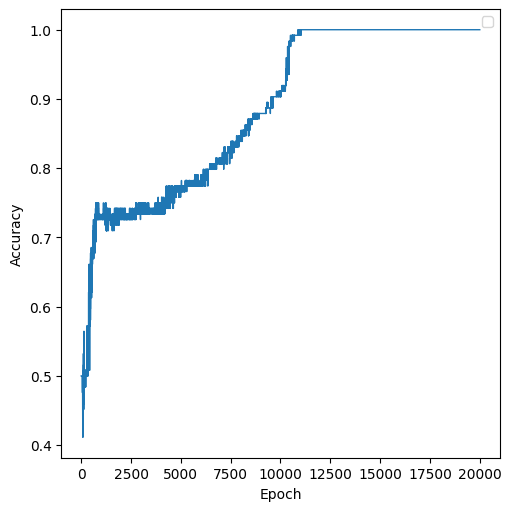

In [13]:
mlp = MLP([4], 6, 1, task = "classification")

learning_curve = mlp.fit(X, y_true, n_epochs = 20000, batch_size = 20, error = "NLL")

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.plot(range(20000), learning_curve, linewidth = 1)
ax.set_xlabel('Epoch')  
ax.set_ylabel("Accuracy")  
ax.legend()

Regression

In [3]:
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

n_epochs = 500

[[  5.216667 -18.076061]
 [  4.25427  -21.552061]
 [ 24.001477 -26.268376]
 ...
 [  5.77557  -15.378069]
 [ 16.957296 -29.006533]
 [ 10.613765 -30.827891]]
(1492, 9)
(1492, 2)


In [9]:
mlp = MLP([2,2], 9, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

grid_parameters = {'n_epochs': (1, 100),
    'batch_size': (100, 1000), 
    'step': (0.0000001, 1), 
    'regularization': ['elastic', 'l1', 'l2', 'no'],
    'alpha_l1': (0, 1),
    'alpha_l2': (0, 1),
    'weights_initialization': ['scaled'],
    'Nesterov': [True, False],
    'momentum': (0, 1),
    'weights_scale': (0.1, 1),
    'early_stopping': [True, False],
    'patience': (1, 20),
    'tolerance': (0.0001, 0.1)
    }

grid = RandomGridsearch(mlp, 'mse')
grid.fit(n_random = 1000, X = X_train,y = y_train, parameters_grid = grid_parameters, n_folds = 2, parallel = True, get_eta = False)

mod = grid.best_model

y_pred = mod.predict(X_test)
mse = get_metric_instance('mse')
print('test score = ' , mse(y_test, y_pred))

Random search of combinations: 1000
Parallelisation activated
Best parameters: {'n_epochs': 76.91880938230412, 'batch_size': 175.77687493956412, 'step': 0.4367004493188072, 'regularization': 'no', 'alpha_l1': 0.8409999663378296, 'alpha_l2': 0.9295620668792778, 'weights_initialization': 'scaled', 'Nesterov': True, 'momentum': 0.07960634396953348, 'weights_scale': 0.28126696964479836, 'early_stopping': True, 'patience': 1.0648641022729013, 'tolerance': 0.09836149541577041}
Best score: 4.629639793054585
test score =  9.265900313208613


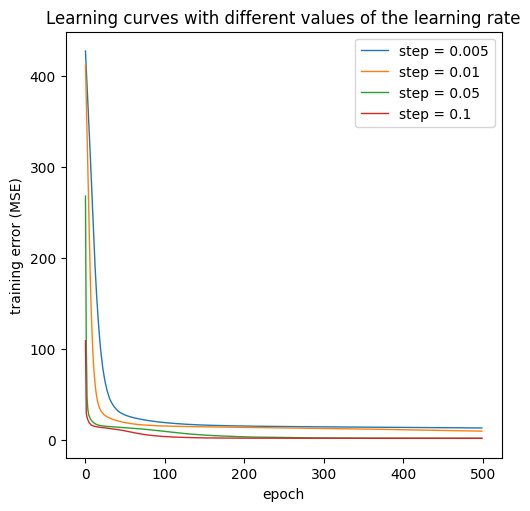

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()

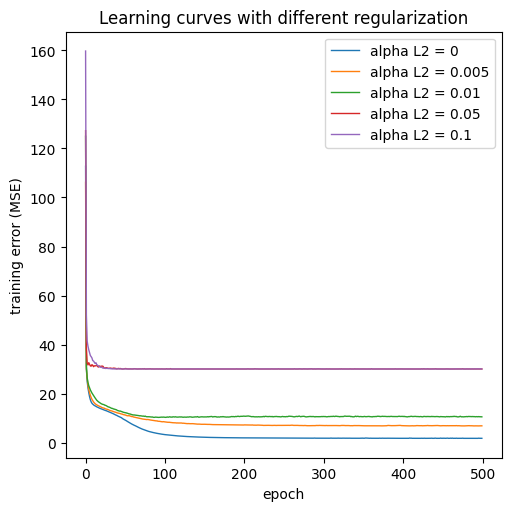

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

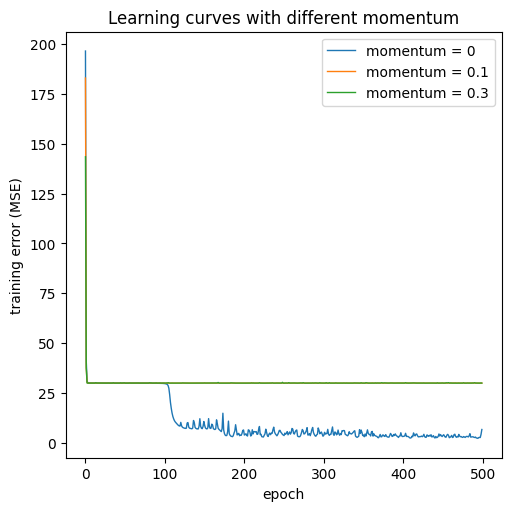

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.3]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

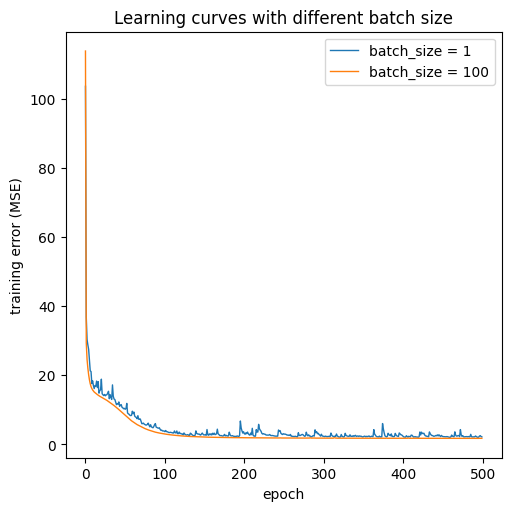

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

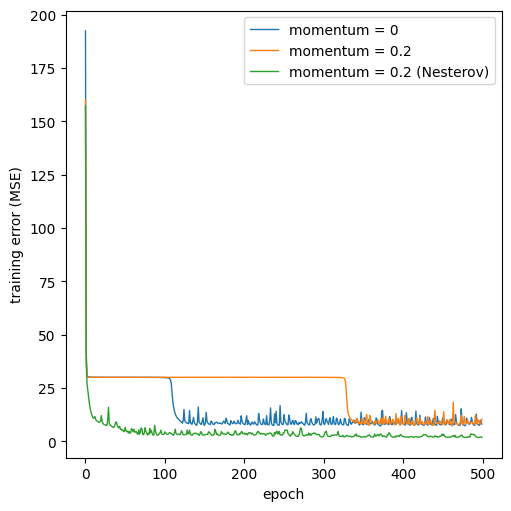

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.2
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum, Nesterov = True)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()

In [ ]:
n_classes = 5
input_size = 5
mlp = MLP([5, 5], input_size, n_classes, task = "classification")